In [28]:
#PARA COMENZAR HAY QUE CARGAR LAS LIBRERIAS DE GRASP Y OTRAS PARA DIBUJAR Y ANALIZAR
import pygrasp
import grasp.plot as gplot
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import os
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", message="Converting non-nanosecond precision datetime values to nanosecond precision")


In [29]:
#Ver la versión de GRASP
print(pygrasp.version())

GRASP core version: v1.1.6 (commit: 31440054 ; branch_name: HEAD)
 Compiled on 2024-12-14 11:15:14 +0000 commit of 2024-04-30 14:51:45 +0200
 With C compiler: cc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0 
 With FORTRAN compiler: GNU Fortran (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0 
 Using generic constant set and build type Release
 Other options: models module compiled (b8bc371),
 Maximum segment size: nx=2 ; ny=2 ; nt=30
 Input drivers loaded: sdata 
 Input transformers loaded: none segment_imagedat 
 Output segment functions loaded: classic classic_plot csv none 
 Output tile functions loaded: csv none 
 Output current functions loaded: none 
 Path to resources: /home/grasp/.local/share/grasp/
 Sparse solver used: SuperLU
 Build System: Linux-6.8.0-40-generic
 Executable path: /grasp_app


In [30]:
#Ejecutar grasp y sacar por pantalla
results = pygrasp.run("settings/settings_aod.yml",print_screen=True)

Config file read successfully
The tile is divided in segments with 1 rows, 1 cols and 1 times. 1 inversions will be performed (sequential version)
Retrieval #0 (1/1): 100.00%: 1 pixels will be processed
in set_RIN_retr_par_number:
    KNSING  = 23 - number of parameters driving forward model for each pixel
    KNSINGF = 6 - number of retrieved parameters for each pixel
in set_RIN_RT_OSH_flags_surf:
    isurf_land(1), isurf_land(2), isurf_water:
     -999    -999    -999
in inversion:
    npixels = 1
    nsd = 2
    lm_min =  0.0000E+00
    ccor_min =  0.0000E+00
    ccor_max =  1.0000E+02
wavelengths(um):
   0.34000   0.38000   0.44000   0.50000   0.67500   0.87000   1.02000   1.64000
in assign_noise_index:
    pixel # 1   MNOISE:
   1   1   1   1   1   1   1   1

 190.57249    1:   0.22680E+00      156.72447 %      pixel # 1      Residual using INITIAL GUESS
  29.82119    1:   0.42973E-01       31.74082 %      pixel # 1      Residual after iteration # 1
  10.67132    1:   0.16177E-01 

In [31]:
#Para ejecutar el comando ayuda
comando=os.popen('grasp help="noises"')
output = comando.read()
print(output)

The following options are accepted matching with "noises":
  retrieval.inversion.noises.add_random_noise: Add random noise to measurements. Valid values: disable (standard_deviation_synthetic is ignored), measurement_fitting (random noise with standard_deviation_synthetic is added to the vector of fitted measurements but it is not added to the fitting), sdata (random noise with standard_deviation_synthetic is added to the fitting sdata measurements so one can get an sdata file with noise added retrieval.mode=forward). If retrieval.mode=inversion, random noise is added to the input sdata measurements.
  retrieval.inversion.noises.noise[].standard_deviation_synthetic: Standard deviation of synthetic random noise added to the corresponding inverted data, if value is 0 no synthetic random noise is added
  retrieval.inversion.noises.noise[].bias_measurements_synthetic: Bias added to the synthetic measurements, if value is 0 no bias is added
  retrieval.inversion.noises.noise[].bias_equation

In [32]:
#Cambiar parametros de los settings al llamar a GRASP
results = pygrasp.run("settings/settings_aod.yml",
                      args=['retrieval.mode=forward'],print_screen=True)

INFO: Parameter retrieval.mode overwritten by command line
INFO: Parameter retrieval.mode overwritten by command line
Config file read successfully
The tile is divided in segments with 1 rows, 1 cols and 1 times. 1 inversions will be performed (sequential version)
Retrieval #0 (1/1): 100.00%: 1 pixels will be processed
in set_RIN_retr_par_number:
    KNSING  = 23 - number of parameters driving forward model for each pixel
    KNSINGF = 6 - number of retrieved parameters for each pixel
in set_RIN_RT_OSH_flags_surf:
    isurf_land(1), isurf_land(2), isurf_water:
     -999    -999    -999
in inversion:
    npixels = 1
    nsd = 2
    lm_min =  0.0000E+00
    ccor_min =  0.0000E+00
    ccor_max =  1.0000E+02
wavelengths(um):
   0.34000   0.38000   0.44000   0.50000   0.67500   0.87000   1.02000   1.64000
in assign_noise_index:
    pixel # 1   MNOISE:
   1   1   1   1   1   1   1   1

 190.57249    1:   0.22680E+00      156.72447 %      pixel # 1      Residual using INITIAL GUESS
Solver SUP

In [33]:
#imprimir resultados
print(results[0,0,0]) #aqui se encuentra una lista de parametros
#Para el caso del indice real de refrraccion:
print(results[0,0,0].retrieved.real_part_of_refractive_index_spectral_dependent[0,0,0,:,0].values)

pixel_result_t[time=1, x=1, y=1]

pixel_result_t
  - information: grasp_output_tile_pixel_information
  - retrieval_res: *grasp_output_tile_retrieval_res
  - retrieval_par: *grasp_output_tile_retrieval_par
  - pixel_fit: *pixel_t
  - pixel_original: *pixel_t
  - aerosol_opt: *grasp_output_tile_aerosol_opt
  - aerosol_rind: *grasp_output_tile_aerosol_rind
  - aerosol_phmx: *grasp_output_tile_aerosol_phmx
  - aerosol_lidar: *grasp_output_tile_aerosol_lidar
  - aerosol_sd2m_mph: *grasp_output_tile_aerosol_sd2m_mph
  - aerosol_sd2m_ext: *grasp_output_tile_aerosol_sd2m_ext
  - aerosol_chem: *grasp_output_tile_aerosol_chem
  - aerosol_pm: *grasp_output_tile_aerosol_pm
  - aerosol_types: *grasp_output_tile_aerosol_types
  - surface_surf: *grasp_output_tile_surface_surf
  - errest_par: *grasp_output_tile_errest_par
  - errest_aerosol_opt: *grasp_output_tile_errest_aerosol_opt
  - errest_aerosol_lidar: *grasp_output_tile_errest_aerosol_lidar
  - errest_aerosol_mic: *grasp_output_tile_errest_aer

In [34]:
#Crear objeto Settings y modifcarlo y ejecutarlo
settings = pygrasp.Settings.load("settings/settings_example_sunphotometer_inversion.yml")
settings.retrieval.mode = "inversion"
results = pygrasp.run(settings,print_screen=False)
#imprimir
print(settings.input.file)

/workspace/master/settings/../sdatas/example_sunphotometer.sdat


In [35]:
#Crear objeto sdata, leerle y ejecutarlo
sdata = pygrasp.SDATA("sdatas/example_sunphotometer.sdat")
NBVM=sdata.pixel[0].meas[0].nbvm[1]
print(NBVM)
print("Radiancia 440 nm")
print(sdata.pixel[0].meas[0].i[:NBVM])
print("AOD 870 nm")
print(sdata.pixel[0].meas[3].aod[0])

results = pygrasp.run(settings, sdata=sdata,print_screen=False)  
print(results[0,0,0].retrieved.real_part_of_refractive_index_spectral_dependent.values)
print(results[0,0,0].aerosol_opt.ext[:,:].values)
print("Convergencia")
print(100*results[0,0,0].retrieval_res.resr[0].values)

26
Radiancia 440 nm
[0.7577930688858032, 0.6847407221794128, 0.5850415229797363, 0.5244524478912354, 0.4859144687652588, 0.460252970457077, 0.42901182174682617, 0.4100485146045685, 0.39597487449645996, 0.383880078792572, 0.3725516200065613, 0.3615611791610718, 0.3347862660884857, 0.30893683433532715, 0.2845064401626587, 0.2619626522064209, 0.24152974784374237, 0.2232358455657959, 0.19267047941684723, 0.1690889596939087, 0.1511658877134323, 0.13783319294452667, 0.12823015451431274, 0.11740301549434662, 0.11377870291471481, 0.11352920532226562]
AOD 870 nm
0.24578000605106354
[[[[[1.4506705]
    [1.4501868]
    [1.4502404]
    [1.4500917]]]]]
[0.9971805  0.46521047 0.30512843 0.24578685]
Convergencia
0.055783294374123216


In [36]:
#Modifico el sdata y ejecuto
#El aod a 1020 se pone 0.5
sdata.pixel[0].meas[3].aod[0] = 0.5
print("El AOD a 1020 nm ahora es:")
print(sdata.pixel[0].meas[3].aod[0])

results2 = pygrasp.run(settings, sdata=sdata) 

#imprimir
print(results2[0,0,0].retrieved.real_part_of_refractive_index_spectral_dependent.values)
print(results2[0,0,0].aerosol_opt.ext[:,:].values)
print("Convergencia")
print(100*results2[0,0,0].retrieval_res.resr[0].values)

El AOD a 1020 nm ahora es:
0.5
[[[[[1.3300002]
    [1.3300002]
    [1.3300002]
    [1.6000001]]]]]
[1.0237603  0.48526415 0.3281103  0.4714381 ]
Convergencia
17.80788004398346


In [37]:
#modificar settings y crear un fichero nuevo
settings = pygrasp.Settings.load("settings/settings_example_sunphotometer_inversion.yml")
settings.retrieval.mode = "forward"
settings.input.file = "sdatas/example_sunphotometer.sdat"
file_name = "settings/settingsSPclon.yml"
settings.dump(file_name)


# Escribir las primeras lineas para asegurarse
def peek_file(file_name: str, line_nums: range):
    with open(file_name, "r") as file:
        lines = file.readlines()
        selected = lines[line_nums.start:line_nums.stop]
        print("".join(selected))

peek_file(file_name, range(0, 8))

# Example of retrieval of synthetic sunphotometer (TOD and radiances) observations (single pixel)
# Authors A.Lopatin & Q.Hu
# Last changes by A. Lopatin on 2016/09/11

# Other comments:
#   monomodal triangular bins size distribution
#   monomodal spectral dependent refractive index
#   exponential aerosol vertical profile with fixed scale altitude of 2000m



In [38]:
#Realizar un bucle en el que las iteraciones hacen una inversion diferente y se almacena n results
settings=pygrasp.Settings.load("settings/settings_aod.yml")
number_of_iterations = range(0, 10)
print("Iterations: ", list(number_of_iterations))
# invertir para cada iteracion:
results = []
for i, ni in enumerate(number_of_iterations):
    settings.retrieval.inversion.convergence.maximum_iterations_for_stopping = ni
    results.append(pygrasp.run(settings, print_screen=False))
    print(ni)
    print(f"Retrieval {i + 1}/{len(number_of_iterations)} finished with number of iterations: {ni}")


Iterations:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
Retrieval 1/10 finished with number of iterations: 0
1
Retrieval 2/10 finished with number of iterations: 1
2
Retrieval 3/10 finished with number of iterations: 2
3
Retrieval 4/10 finished with number of iterations: 3
4
Retrieval 5/10 finished with number of iterations: 4
5
Retrieval 6/10 finished with number of iterations: 5
6
Retrieval 7/10 finished with number of iterations: 6
7
Retrieval 8/10 finished with number of iterations: 7
8
Retrieval 9/10 finished with number of iterations: 8
9
Retrieval 10/10 finished with number of iterations: 9


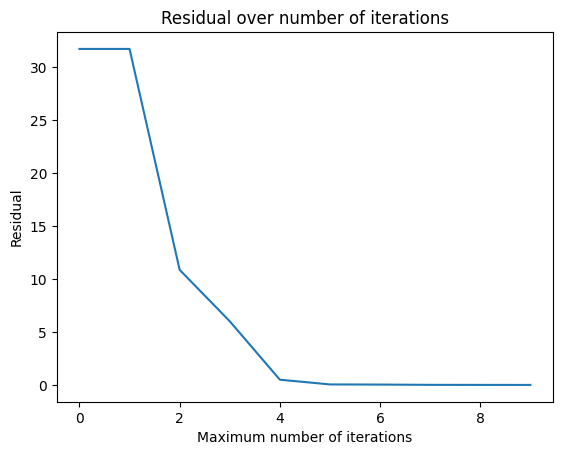

In [39]:
#dibujar los residuos
residual = np.array([results[i][:].retrieval_res.resr[0] for i in range(len(results))])
plt.plot(number_of_iterations, residual*100)
plt.title("Residual over number of iterations")
plt.xlabel("Maximum number of iterations")
plt.ylabel("Residual")
plt.show();


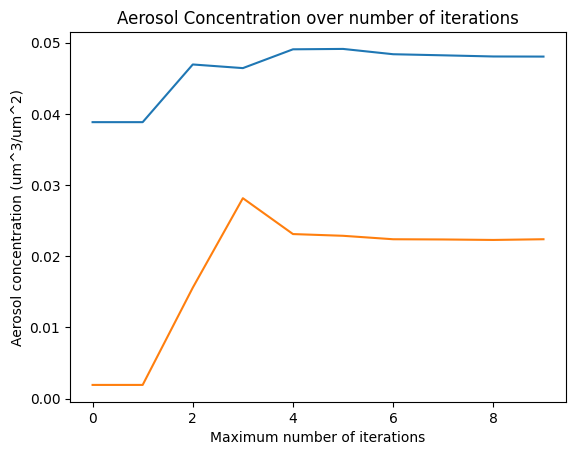

In [40]:
#dibujar las concentraciones
concentracion_aero = np.array([results[i][:].retrieved.aerosol_concentration[0,0,0,0] for i in range(len(results))])
plt.plot(number_of_iterations, concentracion_aero)
plt.title("Aerosol Concentration over number of iterations")
plt.xlabel("Maximum number of iterations")
plt.ylabel("Aerosol concentration (um^3/um^2)")
plt.show();

In [41]:
#Escribir los resultados
#settings = pygrasp.Settings("settings/settings_example_sunphotometer_inversion.yml")
#settings.input.file = "sdatas/example_sunphotometer.sdat"
#settings.output.segment.stream = "output/output_sp.txt"

settings = pygrasp.Settings.load("settings/settings_aod.yml")

settings.retrieval.mode = "inversion"
settings.input.file = "sdatas/example_aod.sdat"
settings.output.segment.stream = "output/output_aod.txt"

results=pygrasp.run(settings, print_screen=False)
print(results.products.aerosol.opt)

True


In [42]:
print(results[0,0,0])

pixel_result_t[time=1, x=1, y=1]

pixel_result_t
  - information: grasp_output_tile_pixel_information
  - retrieval_res: *grasp_output_tile_retrieval_res
  - retrieval_par: *grasp_output_tile_retrieval_par
  - pixel_fit: *pixel_t
  - pixel_original: *pixel_t
  - aerosol_opt: *grasp_output_tile_aerosol_opt
  - aerosol_rind: *grasp_output_tile_aerosol_rind
  - aerosol_phmx: *grasp_output_tile_aerosol_phmx
  - aerosol_lidar: *grasp_output_tile_aerosol_lidar
  - aerosol_sd2m_mph: *grasp_output_tile_aerosol_sd2m_mph
  - aerosol_sd2m_ext: *grasp_output_tile_aerosol_sd2m_ext
  - aerosol_chem: *grasp_output_tile_aerosol_chem
  - aerosol_pm: *grasp_output_tile_aerosol_pm
  - aerosol_types: *grasp_output_tile_aerosol_types
  - surface_surf: *grasp_output_tile_surface_surf
  - errest_par: *grasp_output_tile_errest_par
  - errest_aerosol_opt: *grasp_output_tile_errest_aerosol_opt
  - errest_aerosol_lidar: *grasp_output_tile_errest_aerosol_lidar
  - errest_aerosol_mic: *grasp_output_tile_errest_aer

In [43]:
#Escribir los resultados
#pixel 1 1 1 
print(results[:, :, :].aerosol_opt.ssat[:].values)
print(results[:, :, :].aerosol_rind.mreal[:,:].values)

[0.9763697  0.9747919  0.9726173  0.9696219  0.95997936 0.94874185
 0.94064957 0.9304289 ]
[[1.4009998 1.4009998]
 [1.4009998 1.4009998]
 [1.4009998 1.4009998]
 [1.4009998 1.4009998]
 [1.4009998 1.4009998]
 [1.4009998 1.4009998]
 [1.4009998 1.4009998]
 [1.4009998 1.4009998]]


([<matplotlib.axis.XTick at 0x7aeb44152b90>,
 [Text(0.05, 0, '0.05'),
  Text(0.2, 0, '0.2'),
  Text(1.0, 0, '1'),
  Text(5.0, 0, '5'),
  Text(15.0, 0, '15')])

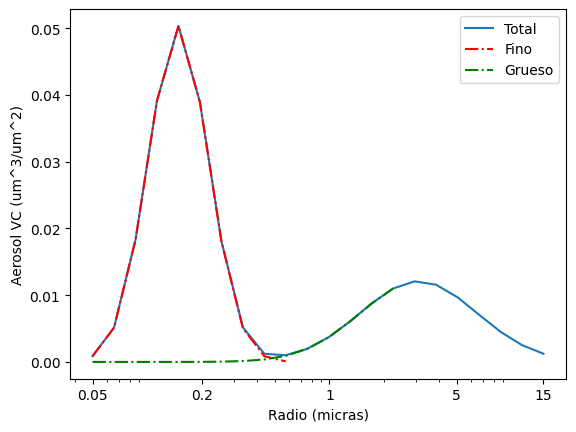

In [44]:
#Dibujar la size distribution de tamaños
#grasp.plot.feature_plots.plot_size_distribution(results[0,0, 0])
VCF=results[0, 0, 0].retrieved.aerosol_concentration[0,0,0,0,0].values
VCC=results[0, 0, 0].retrieved.aerosol_concentration[0,0,0,0,1].values

sdT=(results[0, 0, 0].retrieval_par[0,0,0].sd[0,0:22])
radiusT=(results[0, 0, 0].retrieval_par[0,0,0].sd[0,0:22].radius)
sdF=(results[0, 0, 0].retrieval_par[0,0,0].sd[1,0:10])
radiusF=(results[0, 0, 0].retrieval_par[0,0,0].sd[1,0:10].radius)
sdC=(results[0, 0, 0].retrieval_par[0,0,0].sd[2,0:15])
radiusC=(results[0, 0, 0].retrieval_par[0,0,0].sd[2,0:15].radius)
plt.plot(radiusT,sdT,label='Total')
plt.xscale('log')
plt.ion
plt.plot(radiusF,sdF, '-.r',label='Fino')
plt.plot(radiusC,sdC, '-.g',label='Grueso')
plt.xlabel("Radio (micras)")
plt.ylabel("Aerosol VC (um^3/um^2)");
plt.legend()
tick_positions = [0.05, 0.2, 1, 5, 15]  # Posiciones en el eje x
plt.xticks(tick_positions, labels=tick_positions)  # Usar las mismas etiquetas que las posiciones

#plt.ylabel("Aerosol concentration (um^3/um^2)");
#graph_sd += [getSizeDistributionGraph(results, 'bin', ) + ['black',' - Ref. - ',8,'-','.']];
#drawSizeDist(graph_sd)

In [45]:
#Imprimir radios modales
print(results[0,0,0].retrieved.size_distribution_lognormal)
print(results[0,0,0].retrieved.size_distribution_lognormal[:,:,:,0,:].values)

<xarray.DataArray 'size_distribution_lognormal' (time: 1, y: 1, x: 1,
                                                 size_distribution_lognormal_dim: 2,
                                                 size_distribution_lognormal_mode: 2)>
array([[[[[0.14795077, 3.0902638 ],
          [0.38070542, 0.73830765]]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01T01:00:00
    lon      float64 -5.25
    lat      float64 41.56
Dimensions without coordinates: y, x, size_distribution_lognormal_dim,
                                size_distribution_lognormal_mode
[[[[0.14795077 3.0902638 ]]]]


In [46]:
#Copio las settings de inversion lidar + fotometro 
settings = pygrasp.Settings.load("/workspace/welcome/grasp_python_pages/examples/lidar_and_sunphotometer/settings_example_lidar_sunphotometer_inversion.yml")
file_name = "settings/settingslidarSP.yml"
#SOLO EJECUTAR ESTO 1 VEZ
#settings.dump(file_name)
# hay que quitar retrieval.general y retrieval.general.path_to_internal_files

INFO: Internal files directory /usr/share/grasp/kernels/ does not exist. Switching to the default directory /home/grasp/.local/share/grasp//kernels/ instead.


In [47]:
#Imprimir resultados de la inversion lidar + fotometro 
settings = pygrasp.Settings.load("settings/settingslidarSP.yml")

settings.input.file="/workspace/welcome/grasp_python_pages/examples/lidar_and_sunphotometer/example_lidar_sunphotometer.sdat"
settings.output.segment.stream="output/outpust_lidarSP.txt"
results = pygrasp.run(settings,print_screen=True)


Config file read successfully
The tile is divided in segments with 1 rows, 1 cols and 1 times. 1 inversions will be performed (sequential version)
Retrieval #0 (1/1): 100.00%: 1 pixels will be processed
in set_RIN_retr_par_number:
    KNSING  = 202 - number of parameters driving forward model for each pixel
    KNSINGF = 174 - number of retrieved parameters for each pixel
in set_RIN_RT_OSH_flags_surf:
    isurf_land(1), isurf_land(2), isurf_water:
    20101   20201    -999
in inversion:
    npixels = 1
    nsd = 2
    lm_min =  0.0000E+00
    ccor_min =  0.0000E+00
    ccor_max =  1.0000E+02
    eps_err = 0.00010
    nlvls_geom = 100
    aerosol profile   type = 1  (0 - exponential, 1 - gaussian, 2 – threshold)
    molecular profile type = 1  (0 - exponential, 1 - stdatm)
    Measurements of upward looking instruments are inverted.
wavelengths(um):
   0.35500   0.44040   0.53200   0.67390   0.87090   1.01970   1.06400
in assign_noise_index:
    pixel # 1   MNOISE:
   3   2   1   4   2 

Total Time: 1 pixels processed in 482.359101 seconds (cpu time: 485.858148). Average per pixel: 482.359101 (cpu time: 485.858148)
Algorithm Time: 1 pixels processed in 480.820230 seconds (cpu time: 484.301892). Average per pixel: 480.820230 (cpu time: 484.301892)
Control Unit Time: 1 pixels processed in 1.538871 seconds (cpu time: 1.556256). Average per pixel: 1.538871 (cpu time: -1.942791)


In [48]:
#Que hay en el output
print(results[0,0,0])

pixel_result_t[time=1, x=1, y=1]

pixel_result_t
  - information: grasp_output_tile_pixel_information
  - retrieval_res: *grasp_output_tile_retrieval_res
  - retrieval_par: *grasp_output_tile_retrieval_par
  - pixel_fit: *pixel_t
  - pixel_original: *pixel_t
  - aerosol_opt: *grasp_output_tile_aerosol_opt
  - aerosol_rind: *grasp_output_tile_aerosol_rind
  - aerosol_phmx: *grasp_output_tile_aerosol_phmx
  - aerosol_lidar: *grasp_output_tile_aerosol_lidar
  - aerosol_sd2m_mph: *grasp_output_tile_aerosol_sd2m_mph
  - aerosol_sd2m_ext: *grasp_output_tile_aerosol_sd2m_ext
  - aerosol_chem: *grasp_output_tile_aerosol_chem
  - aerosol_pm: *grasp_output_tile_aerosol_pm
  - aerosol_types: *grasp_output_tile_aerosol_types
  - surface_surf: *grasp_output_tile_surface_surf
  - errest_par: *grasp_output_tile_errest_par
  - errest_aerosol_opt: *grasp_output_tile_errest_aerosol_opt
  - errest_aerosol_lidar: *grasp_output_tile_errest_aerosol_lidar
  - errest_aerosol_mic: *grasp_output_tile_errest_aer

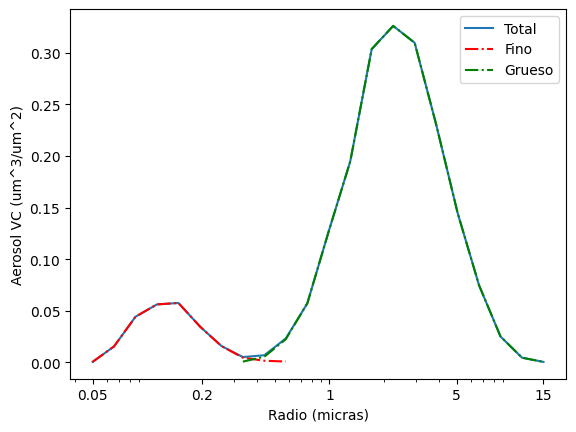

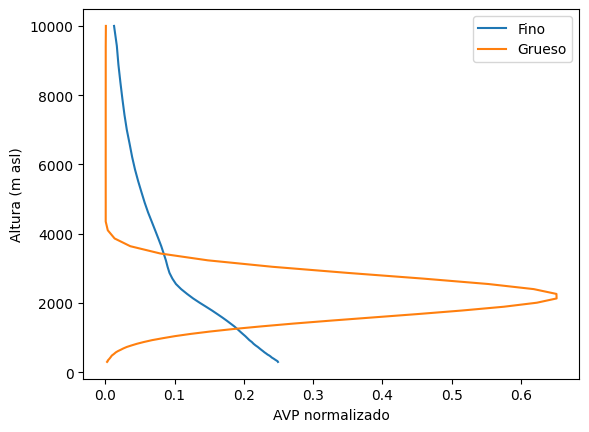

In [49]:
sdT=(results[0, 0, 0].retrieval_par[0,0,0].sd[0,0:22])
radiusT=(results[0, 0, 0].retrieval_par[0,0,0].sd[0,0:22].radius)
sdF=(results[0, 0, 0].retrieval_par[0,0,0].sd[1,0:10])
radiusF=(results[0, 0, 0].retrieval_par[0,0,0].sd[1,0:10].radius)
sdC=(results[0, 0, 0].retrieval_par[0,0,0].sd[2,0:15])
radiusC=(results[0, 0, 0].retrieval_par[0,0,0].sd[2,0:15].radius)
plt.plot(radiusT,sdT,label='Total')
plt.xscale('log')
plt.ion
plt.plot(radiusF,sdF, '-.r',label='Fino')
plt.plot(radiusC,sdC, '-.g',label='Grueso')
plt.xlabel("Radio (micras)")
plt.ylabel("Aerosol VC (um^3/um^2)");
plt.legend()
tick_positions = [0.05, 0.2, 1, 5, 15]  # Posiciones en el eje x
plt.xticks(tick_positions, labels=tick_positions)  # Usar las mismas etiquetas que las posiciones
plt.show()

avF=(results[0, 0, 0].retrieved.vertical_profile_normalized[0,0,0,:,0].values)
hF=(results[0, 0, 0].retrieved.vertical_profile_normalized[0,0,0,:,1].height)
avC=(results[0, 0, 0].retrieved.vertical_profile_normalized[0,0,0,:,1].values)
hC=(results[0, 0, 0].retrieved.vertical_profile_normalized[0,0,0,:,1].height)

plt.plot(avF,hF,label='Fino')
plt.ion
plt.plot(avC,hC,label='Grueso')
plt.xlabel("AVP normalizado")
plt.ylabel("Altura (m asl)");
plt.legend()
plt.show()

In [50]:
#CONTROL SDATAS
seg = pygrasp.Segment("/workspace/welcome/grasp_python_pages/examples/lidar_and_sunphotometer/example_lidar_sunphotometer.sdat")

In [51]:
print(seg.sdata.pixel[0])

pixel_t
  - hobs: float
  - nwl: int
  - cloudy: int
  - x: float
  - y: float
  - t: int64_t
  - ix: int
  - iy: int
  - it: int
  - out_x: int
  - out_y: int
  - out_t: int
  - masl: float
  - land_percent: float
  - irow: int
  - icol: int
  - file_index: int
  - ifgas: int
  - meas: data_wl_t[_KWM]
  - hvp: float[_KVERTM]



In [52]:
# copiar y añadir un pixel (Se copian todos los valores)
seg.sdata.pixel[1] = seg.sdata.pixel[0]

seg.sdata.npixels = 2
seg.sdata.nt = 2

seg.sdata.pixel[1].it = 2  # hay que decir al pixel que es el segundo en el orden
seg.sdata.pixel[1].t += 24 * 60 * 60  # tiempo es en segundos (unix epoch), aqui se le dice que es de un dia después

In [53]:
#ver las longitudes
nwl = seg.sdata.pixel[1].nwl
print(nwl)  #El pixel debe tener 7 longitudes: 4 fotometro + 3 lidar
print([round(seg.sdata.pixel[1].meas[i].wl, 3) for i in range(nwl)])

7
[0.355, 0.44, 0.532, 0.674, 0.871, 1.02, 1.064]


In [54]:
#Ver el tipo de medida
print("tipo de medida lidar (355 nm)")
print(seg.sdata.pixel[1].meas[0].meas_type[0])
print("tipo de medida aod 440")
print(seg.sdata.pixel[1].meas[1].meas_type[0])
print("tipo de medida Radiancia 440")
print(seg.sdata.pixel[1].meas[1].meas_type[1])


tipo de medida lidar (355 nm)
31
tipo de medida aod 440
11
tipo de medida Radiancia 440
41


In [55]:
#Ver el numero de medidas para cada tipo y longitud de onda
nbvm = seg.sdata.pixel[1].meas[1].nbvm[1] #Radiancia a 440 (segunda longitud y segundo tipo)
print(np.array(nbvm))

26


In [56]:
#Extraer los datos del sdata de la señal lidar (RCS)
nbvm = seg.sdata.pixel[1].meas[0].nbvm[0]
lidar_signal = np.array(seg.sdata.pixel[1].meas[0].ls[:nbvm])
lidar_signal2 = np.array(seg.sdata.pixel[1].meas[2].ls[:nbvm])
lidar_signal3 = np.array(seg.sdata.pixel[1].meas[6].ls[:nbvm])
print(lidar_signal2[0:])

[8.25995539e-06 9.04881927e-06 9.86178293e-06 1.07455971e-05
 1.16486590e-05 1.25693741e-05 1.35669525e-05 1.46443226e-05
 1.56829465e-05 1.68032529e-05 1.80043207e-05 1.92351199e-05
 2.04907901e-05 2.17651213e-05 2.31332597e-05 2.53728049e-05
 2.96832295e-05 3.80080783e-05 5.32390477e-05 7.81758645e-05
 1.14582450e-04 1.62433469e-04 2.20303307e-04 2.83720990e-04
 3.46698391e-04 4.03595157e-04 4.48398321e-04 4.76397458e-04
 4.87789628e-04 4.82700503e-04 4.65641235e-04 4.39906667e-04
 4.09770000e-04 3.78463505e-04 3.49401147e-04 3.21904139e-04
 2.98245897e-04 2.78371997e-04 2.61956477e-04 2.49243778e-04
 2.37726184e-04 2.30006292e-04 2.23398107e-04 2.18813482e-04
 2.15008084e-04 2.12877727e-04 2.11658771e-04 2.10269776e-04
 2.09575112e-04 2.10168961e-04 2.10378523e-04 2.10769620e-04
 2.11945706e-04 2.12757819e-04 2.13782128e-04 2.14737360e-04
 2.15334774e-04 2.16157248e-04 2.17821318e-04 2.18237285e-04]


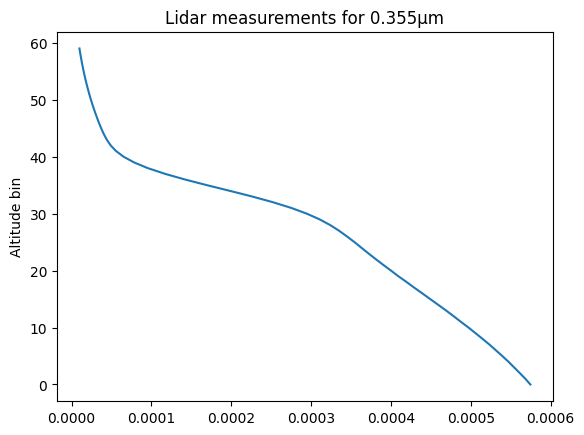

In [57]:
#Dibujar la señal lidar
lidar_signal = np.array(seg.sdata.pixel[1].meas[0].ls[:nbvm]) #355 nm
plt.plot((lidar_signal), np.argsort(np.arange(len(lidar_signal)))[::-1])
plt.title(f"Lidar measurements for {round(seg.sdata.pixel[1].meas[0].wl, 3)}µm");
plt.ylabel("Altitude bin");


longitud de onda
355.0
longitud de onda
532.0
longitud de onda
1064.0


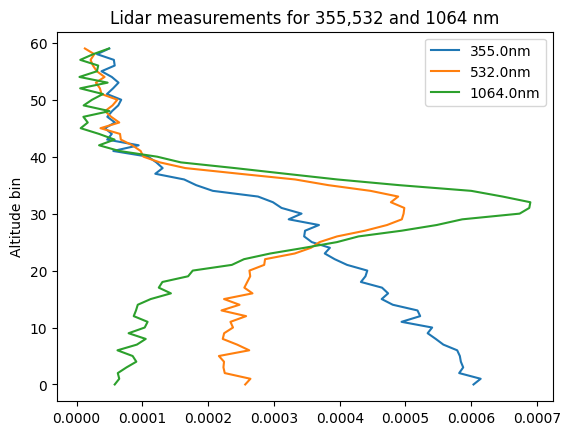

In [58]:
#Añadir ruido a las medidas
for iwl in [0,2,6]:
    print("longitud de onda")
    print(round(1000*seg.sdata.pixel[1].meas[iwl].wl, 3))
    lidar_signal = np.array(seg.sdata.pixel[1].meas[iwl].ls[:nbvm])
    lidar_signal += np.random.rand(lidar_signal.size) * 5E-5  # añade ruido aleatorio
    seg.sdata.pixel[1].meas[iwl].ls[:nbvm] = lidar_signal

    plt.plot((lidar_signal), np.argsort(np.arange(len(lidar_signal)))[::-1],label=f"{1000*round(seg.sdata.pixel[1].meas[iwl].wl, 3)}nm")
    plt.ion()

plt.title(f"Lidar measurements for 355,532 and 1064 nm");
plt.ylabel("Altitude bin");
plt.legend(loc="best");

[183.5 184.  185.  186.  187.  188.  190.  192.  194.  196.  198.  200.
 205.  210.  215.  220.  225.  230.  240.  250.  260.  270.  280.  300.
 320.  340. ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


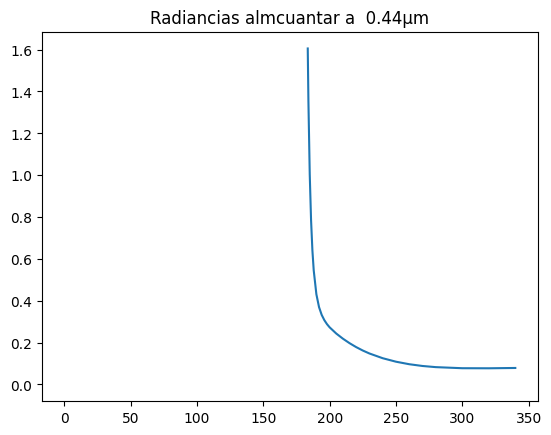

In [59]:
#dibujo las radiancias  440 nm
nbvm=seg.sdata.pixel[1].meas[1].nbvm[1] # number of valid measurements
Rad = np.array(seg.sdata.pixel[1].meas[1].i[:nbvm])
Azimuth=np.array(seg.sdata.pixel[1].meas[1].phi[1][:nbvm])

plt.plot(Azimuth, Rad)
plt.title(f"Radiancias almcuantar a  {round(seg.sdata.pixel[1].meas[1].wl, 3)}µm");
print(Azimuth)

plt.ion() 
nbvm=seg.sdata.pixel[1].meas[5].nbvm[1] # number of valid measurements
Rad = np.array(seg.sdata.pixel[5].meas[1].i[:nbvm])
Azimuth=np.array(seg.sdata.pixel[5].meas[1].phi[1][:nbvm])

plt.plot(Azimuth, Rad)
plt.title(f"Radiancias almcuantar a  {round(seg.sdata.pixel[1].meas[1].wl, 3)}µm");
print(Azimuth)